In [29]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

In [ ]:
current_path = os.getcwd()
pvd = os.path.join(current_path, 'datasets/original/PlantVillage')
plt.figure(figsize=(16, 16))

for i in range(16):
    plt.subplot(4, 4, i + 1)

    rand_class = np.random.choice(os.listdir(pvd), 1)[0]
    rand_int = np.random.randint(1, 100)

    rand_path = "datasets/original/PlantVillage/{}/image ({}).JPG".format(rand_class, rand_int)

    title = rand_class.lower().replace('_', ' ').replace('   ', ' ').replace(',', '')
    plt.title(title, fontsize=16)
    plt.imshow(tf.keras.utils.load_img(rand_path))
    plt.axis("off")
    plt.savefig('plant_village_examples.png')

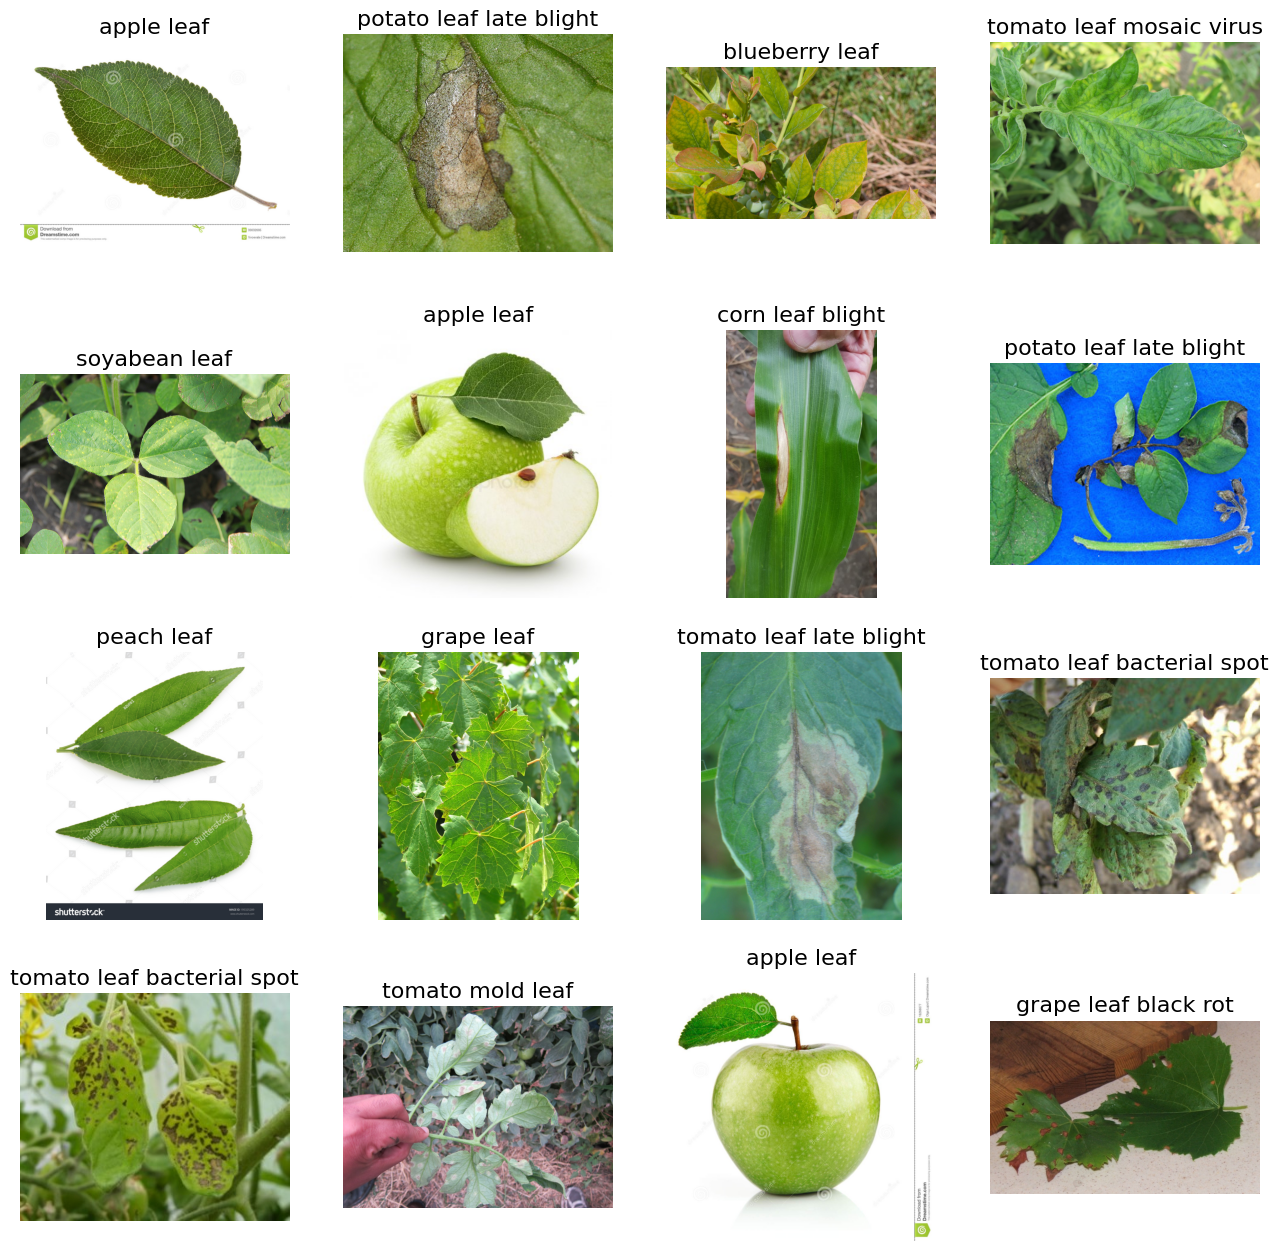

In [27]:
current_path = os.getcwd()
pd = os.path.join(current_path, 'datasets/original/PlantDoc/train')
plt.figure(figsize=(16, 16))

for i in range(16):
    plt.subplot(4, 4, i + 1)

    rand_class = np.random.choice(os.listdir(pd), 1)[0]
    rand_photo = np.random.choice(os.listdir("datasets/original/PlantDoc/train/{}".format(rand_class)))

    rand_path = "datasets/original/PlantDoc/train/{}/{}".format(rand_class, rand_photo)

    title = rand_class.lower().replace('_', ' ').replace('   ', ' ').replace(',', '')
    plt.title(title, fontsize=16)
    plt.imshow(tf.keras.utils.load_img(rand_path))
    plt.axis("off")
    plt.savefig('plant_doc_examples.png')


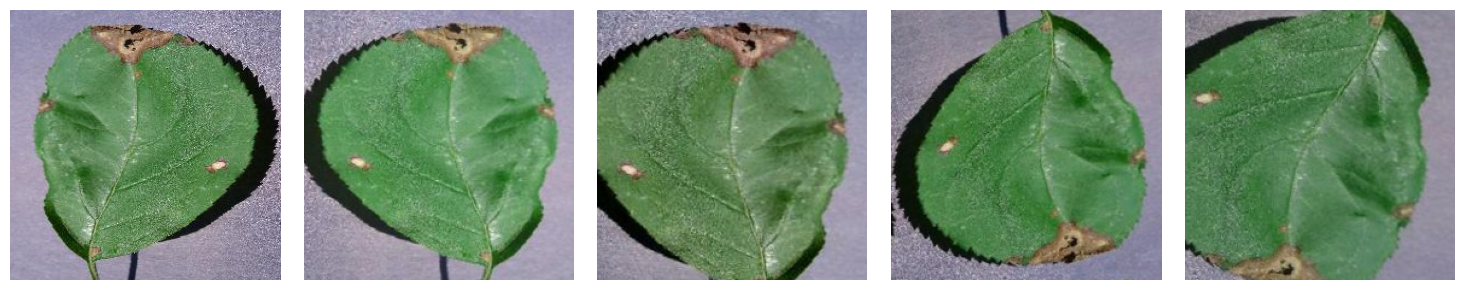

In [39]:
def get_crop_size(img, min_prop=0.7):
    def rand_prop(x):
        return x + (1. - x) * np.random.random()

    height, width, channels = img.shape

    if height > width:
        height_prop = rand_prop(min_prop)
        width_prop = rand_prop(height_prop)
    else:
        width_prop = rand_prop(min_prop)
        height_prop = rand_prop(width_prop)

    height = np.floor(height_prop * height).astype(int)
    width = np.floor(width_prop * width).astype(int)
    return height, width, channels

def random_augmentation(img):
    img = tf.keras.preprocessing.image.random_rotation(img, 20, row_axis=0, col_axis=1, channel_axis=2, fill_mode='reflect')
    img = tf.image.random_contrast(img, 0.8, 1.2)
    img = tf.image.random_brightness(img, 0.08)
    img = tf.image.random_hue(img, 0.025)
    img = tf.image.random_saturation(img, 0.85, 1.15)
    img = tf.image.random_jpeg_quality(img, 75, 95)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_crop(img, get_crop_size(img, 0.67))
    return img.numpy()


def get_augmented_image(img):
    return Image.fromarray(random_augmentation(np.array(img.convert('RGB')))).resize((224, 224))

plt.figure(figsize=(15, 3))

rand_class = np.random.choice(os.listdir(pvd), 1)[0]
rand_int = np.random.randint(1, 100)

rand_path = "datasets/original/PlantVillage/{}/image ({}).JPG".format(rand_class, rand_int)

for i in range(5):
    plt.subplot(1, 5, i + 1)
    img = tf.keras.utils.load_img(rand_path)
    if i == 0:
        plt.imshow(img)
    else:
        plt.imshow(get_augmented_image(img))
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('plant_village_augmentation_examples.png')

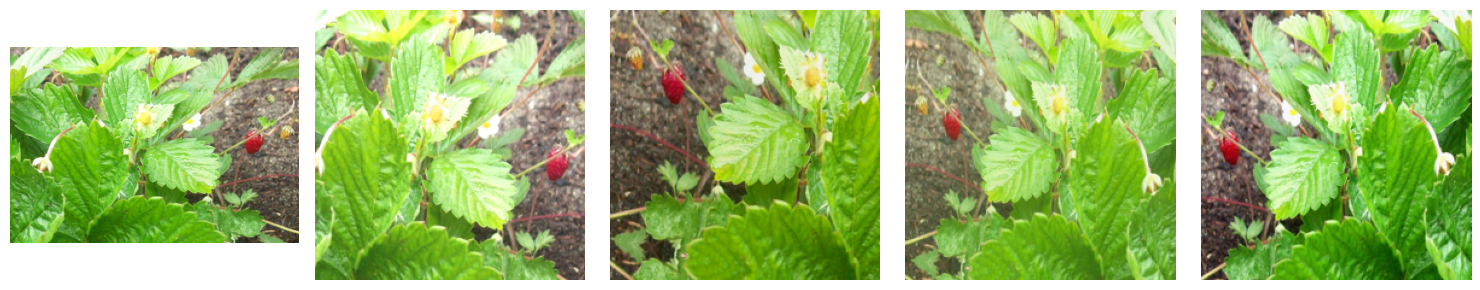

In [43]:
def get_augmented_image(img):
    return Image.fromarray(random_augmentation(np.array(img.convert('RGB')))).resize((224, 224))

plt.figure(figsize=(15, 3))

rand_class = np.random.choice(os.listdir(pd), 1)[0]
rand_photo = np.random.choice(os.listdir("datasets/original/PlantDoc/train/{}".format(rand_class)))

rand_path = "datasets/original/PlantDoc/train/{}/{}".format(rand_class, rand_photo)

for i in range(5):
    plt.subplot(1, 5, i + 1)
    img = tf.keras.utils.load_img(rand_path)
    if i == 0:
        plt.imshow(img)
    else:
        plt.imshow(get_augmented_image(img))
    plt.axis("off")
    plt.tight_layout()
    plt.savefig('plant_doc_augmentation_examples.png')

In [48]:
print(len(os.listdir("datasets/original/PlantVillage")))
counter = 0
for i in os.listdir("datasets/original/PlantVillage"):
    counter += len(os.listdir(f"datasets/original/PlantVillage/{i}"))
print(counter)

39
55448
